In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
from shapely import wkt
import seaborn as sns
from shapely.geometry import Polygon

In [2]:
# Read the file, assuming it's tab-separated and the first row contains column names
file_path = '0083528-240321170329656.csv'   
df = pd.read_csv(file_path, sep='\t')

In [3]:
#Splits the 'eeacellcode' column into three new columns ('resolution', 'long', 'lat')
#    with four characters in each and adds them to the DataFrame.
#
#    Parameters:
#    - df: The original DataFrame containing the 'eeacellcode' column.
#
#    Returns:
#    - df: The modified DataFrame with the new columns added.
#    """
# Check if 'eeacellcode' column exists in the DataFrame
if 'eeacellcode' in df.columns:
     # Splitting the 'eeacellcode' column into three new columns
     df['resolution'] = df['eeacellcode'].str[:4]
     df['long'] = df['eeacellcode'].str[4:8]
     df['lat'] = df['eeacellcode'].str[8:12]
else:
     print("The column 'eeacellcode' does not exist in the DataFrame.")

In [4]:
df = df.dropna()

In [5]:
# Remove the first character from 'long' and 'lat' columns and create new 'longitude' and 'latitude' columns
df['longitude'] = df['long'].str[1:]

In [6]:
df['latitude'] = df['lat'].str[1:]

In [7]:
df['longitude'] = pd.to_numeric(df['longitude'], downcast='float') * 10000
df['latitude'] = pd.to_numeric(df['latitude'], downcast='float') * 10000

In [8]:
# Print the first few rows of the DataFrame to verify the new columns
print(df.head(10))

    year   eeacellcode  specieskey  count  female_count  male_count  \
25  2024  10kmE263N192   8332393.0      1             0           0   
26  2024  10kmE263N195   9751099.0      1             0           0   
27  2024  10kmE264N191   8332393.0      1             0           0   
28  2024  10kmE264N191   9362027.0      1             0           0   
29  2024  10kmE264N192   9362027.0      1             0           0   
30  2024  10kmE264N194   8332393.0      1             0           0   
31  2024  10kmE264N194   9761484.0      1             0           0   
32  2024  10kmE264N195   2498252.0      1             0           0   
33  2024  10kmE264N195   2498343.0      1             0           0   
34  2024  10kmE264N195   9751099.0      1             0           0   

    hermaphrodite_count  mincoordinateuncertaintyinmeters resolution  long  \
25                    0                           28240.0       10km  E263   
26                    0                           10000.0     

In [9]:
# Convert 'longitude' and 'latitude' to numeric types, if they're not already
df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')
df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')

# Create a new GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))

# Set the coordinate reference system (CRS) to ETRS89-LAEA Europe (EPSG:3035) for latitude and longitude
gdf.crs = "EPSG:3035"

# Now 'gdf' is a GeoDataFrame with a 'geometry' column holding spatial data

# Example: Save this GeoDataFrame to a shapefile
# gdf.to_file("species_locations.shp")

print(gdf.head())


    year   eeacellcode  specieskey  count  female_count  male_count  \
25  2024  10kmE263N192   8332393.0      1             0           0   
26  2024  10kmE263N195   9751099.0      1             0           0   
27  2024  10kmE264N191   8332393.0      1             0           0   
28  2024  10kmE264N191   9362027.0      1             0           0   
29  2024  10kmE264N192   9362027.0      1             0           0   

    hermaphrodite_count  mincoordinateuncertaintyinmeters resolution  long  \
25                    0                           28240.0       10km  E263   
26                    0                           10000.0       10km  E263   
27                    0                           28240.0       10km  E264   
28                    0                           28240.0       10km  E264   
29                    0                           28240.0       10km  E264   

     lat  longitude   latitude                         geometry  
25  N192  2630000.0  1920000.0  POINT 

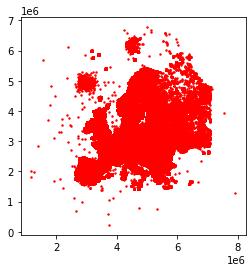

In [10]:
# Basic plot
gdf.plot(marker='o', color='red', markersize=2)
plt.show()


In [11]:
# Step 1: Calculate the start year of the decade for each row and create a new 'decade' column
gdf['decade'] = (gdf['year'] // 10) * 10

In [12]:
gdf['geometry_wkt'] = gdf['geometry'].apply(lambda x: x.wkt)

In [59]:
# Grouping the DataFrame by 'eeacellcode' and 'specieskey'
#grouped_df = gdf.groupby(['eeacellcode', 'specieskey', 'long', 'lat', 'longitude', 'latitude','geometry_wkt'])[['count', 'female_count', 'male_count']].sum()
grouped_df = gdf.groupby(['decade','eeacellcode', 'specieskey', 'long', 'lat', 'longitude', 'latitude','geometry_wkt'])['count', 'female_count', 'male_count'].sum().reset_index()


C:\Users\quentin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [60]:
#print(grouped_df.head(1))
print(grouped_df.describe())

             decade    specieskey     longitude      latitude         count  \
count  1.476502e+06  1.476502e+06  1.476502e+06  1.476502e+06  1.476502e+06   
mean   2.003892e+03  4.942655e+06  4.240123e+06  3.424666e+06  2.421870e+01   
std    1.680429e+01  3.071132e+06  7.506423e+05  8.232751e+05  1.345226e+02   
min    1.900000e+03  2.497999e+06  1.160000e+06  2.300000e+05  1.000000e+00   
25%    2.000000e+03  2.498255e+06  3.630000e+06  2.860000e+06  1.000000e+00   
50%    2.010000e+03  2.498347e+06  4.260000e+06  3.370000e+06  2.000000e+00   
75%    2.020000e+03  8.214667e+06  4.730000e+06  4.010000e+06  8.000000e+00   
max    2.020000e+03  1.225812e+07  7.930000e+06  6.770000e+06  1.719800e+04   

       female_count    male_count  
count  1.476502e+06  1.476502e+06  
mean   5.334270e-01  7.615987e-01  
std    1.402021e+01  1.186829e+01  
min    0.000000e+00  0.000000e+00  
25%    0.000000e+00  0.000000e+00  
50%    0.000000e+00  0.000000e+00  
75%    0.000000e+00  0.000000e+00  


In [61]:
print(grouped_df.crs)

EPSG:3035


In [62]:
print(grouped_df.columns)

Index(['decade', 'eeacellcode', 'specieskey', 'long', 'lat', 'longitude',
       'latitude', 'geometry_wkt', 'count', 'female_count', 'male_count'],
      dtype='object')


In [63]:
grouped_df['geometry'] = grouped_df['geometry_wkt'].apply(wkt.loads)

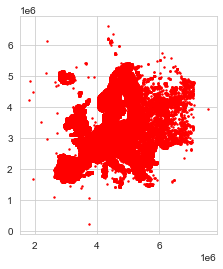

In [78]:
# Basic plot of Aythya fuligula (L., 1758) = 2498261
# Basic plot of Anas platyrhynchos Linnaeus, 1758 = 9761484

# Select rows where the 'specieskey' column matches the specific_specieskey
filtered_gdf = grouped_df[grouped_df['specieskey'] == 9761484]


filtered_gdf.plot(marker='o', color='red', markersize=2)
plt.show()

In [79]:
# Remove rows where both 'female_count' and 'male_count' are zero, and 'eeacellcode' is NaN
filtered_gdf = filtered_gdf[(filtered_gdf['female_count'] > 1) | (filtered_gdf['male_count'] > 1)]

In [80]:
# Ensure there's no division by zero
filtered_gdf['male_to_female_ratio'] = np.where(filtered_gdf['female_count'] > 0, filtered_gdf['male_count'] / (filtered_gdf['female_count'] + filtered_gdf['male_count']), np.nan)


C:\Users\quentin\Anaconda3\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [81]:
# Print the resulting DataFrame to verify the rows have been removed
print(filtered_gdf.head(5))

     decade   eeacellcode  specieskey  long   lat  longitude   latitude  \
164    1900  10kmE306N501   9761484.0  E306  N501  3060000.0  5010000.0   
614    1900  10kmE350N365   9761484.0  E350  N365  3500000.0  3650000.0   
625    1900  10kmE351N366   9761484.0  E351  N366  3510000.0  3660000.0   
788    1900  10kmE394N323   9761484.0  E394  N323  3940000.0  3230000.0   
813    1900  10kmE395N305   9761484.0  E395  N305  3950000.0  3050000.0   

                geometry_wkt  count  female_count  male_count  \
164  POINT (3060000 5010000)      3             2           0   
614  POINT (3500000 3650000)      5             2           3   
625  POINT (3510000 3660000)      5             2           3   
788  POINT (3940000 3230000)      4             1           2   
813  POINT (3950000 3050000)      2             0           2   

                            geometry  male_to_female_ratio  
164  POINT (3060000.000 5010000.000)              0.000000  
614  POINT (3500000.000 3650000.000)

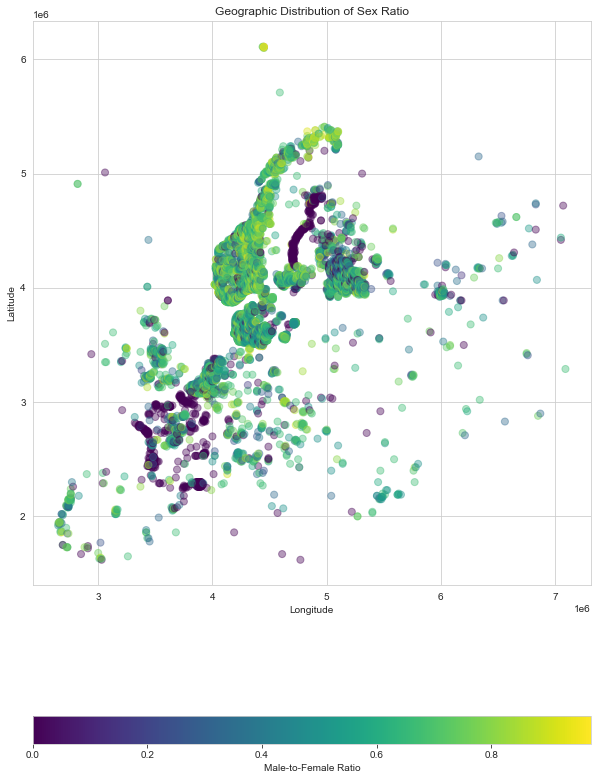

In [85]:
fig, ax = plt.subplots(1, 1, figsize=(10, 16))

# Plot using the 'sex_ratio' column to color the points
filtered_gdf.plot(column='male_to_female_ratio', ax=ax, legend=True, 
         legend_kwds={'label': "Male-to-Female Ratio", 'orientation': "horizontal"},
         cmap='viridis', markersize=50, alpha=0.4)  # Adjust 'markersize' and 'alpha' as needed

plt.title('Geographic Distribution of Sex Ratio')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [83]:
# Drop NaN values from your dataset
filtered_gdf = filtered_gdf.dropna(subset=['decade', 'male_to_female_ratio'])

# Also, ensure there are no infinite values
filtered_gdf = filtered_gdf.replace([np.inf, -np.inf], np.nan).dropna(subset=['decade', 'male_to_female_ratio'])

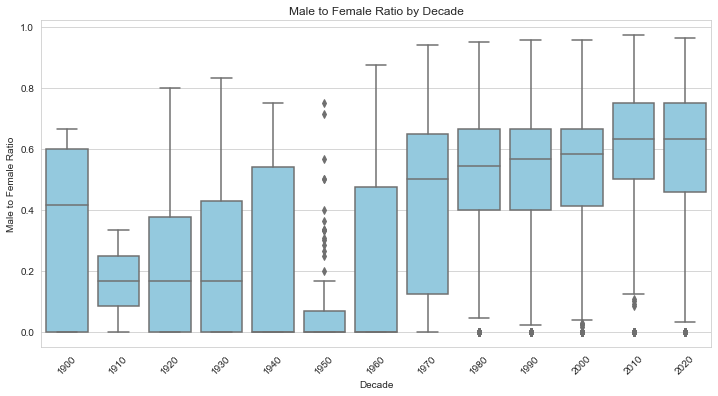

In [84]:
# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

plt.figure(figsize=(12, 6))

# Create a box plot
sns.boxplot(x='decade', y='male_to_female_ratio', data=filtered_gdf, color='skyblue')

plt.title('Male to Female Ratio by Decade')
plt.xlabel('Decade')
plt.ylabel('Male to Female Ratio')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability

plt.show()


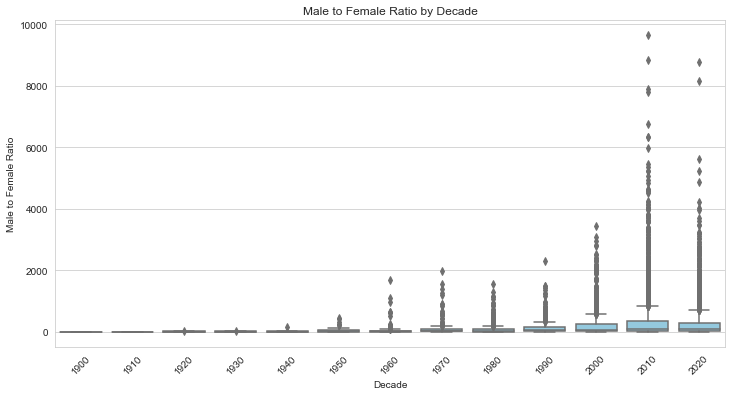

In [86]:
# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

plt.figure(figsize=(12, 6))

# Create a box plot
sns.boxplot(x='decade', y='count', data=filtered_gdf, color='skyblue')

plt.title('Male to Female Ratio by Decade')
plt.xlabel('Decade')
plt.ylabel('Male to Female Ratio')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability

plt.show()


In [91]:
from shapely.geometry import Polygon

def create_square_polygon_from_point(point, side_length=10000):
    """Create a square polygon with the given side length, using the point as the bottom-left corner."""
    if point is None:
        return None
    lower_left = point
    lower_right = (point.x + side_length, point.y)
    upper_right = (point.x + side_length, point.y + side_length)
    upper_left = (point.x, point.y + side_length)
    return Polygon([lower_left, lower_right, upper_right, upper_left, lower_left])


In [92]:
# Make sure your GeoDataFrame is in the correct CRS (EPSG:3035 or another meter-based CRS)
# If not, convert it: gdf = gdf.to_crs('EPSG:3035')

# Apply the function to create a new 'square_polygon' column
filtered_gdf['square_polygon'] = filtered_gdf['geometry'].apply(create_square_polygon_from_point)


In [95]:
filtered_gdf = filtered_gdf.set_geometry('square_polygon')

In [118]:
# Load the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
europe = world[world['continent'] == 'Europe']
europe = europe.to_crs(filtered_gdf.crs)

C:\Users\quentin\Anaconda3\lib\site-packages\geopandas\plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


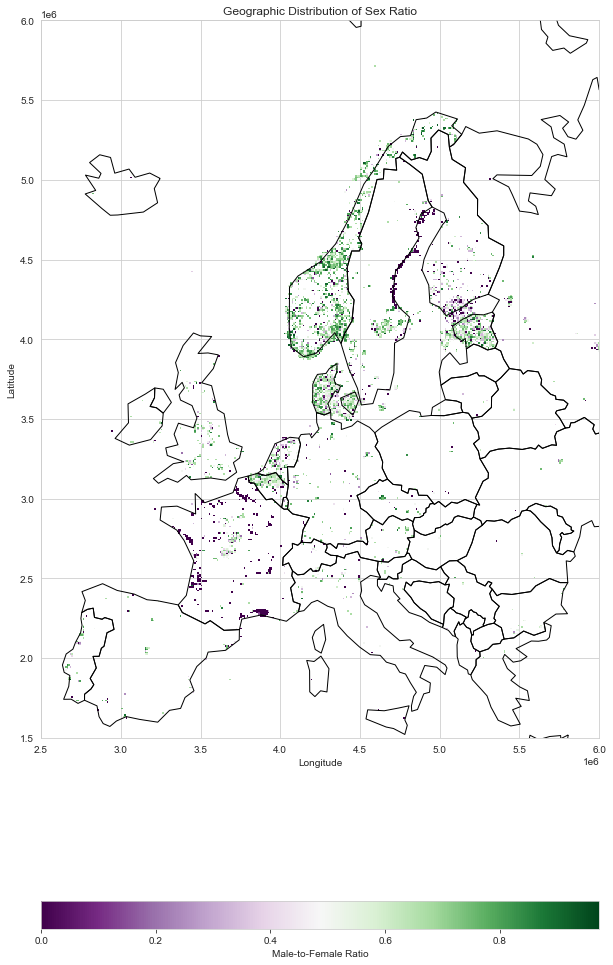

In [124]:
# Example bounds (you'll replace these with your desired bounds)
min_longitude, max_longitude = 2500000, 6000000  # Adjust these values to your desired longitude bounds
min_latitude, max_latitude = 1500000, 6000000    # Adjust these values to your desired latitude bounds



fig, ax = plt.subplots(1, 1, figsize=(10, 20))

# Plot using the 'sex_ratio' column to color the points
filtered_gdf.plot(edgecolor='none', column='male_to_female_ratio', ax=ax, legend=True, 
         legend_kwds={'label': "Male-to-Female Ratio", 'orientation': "horizontal"},
         cmap='PRGn', markersize=50, alpha=1)  # Adjust 'markersize' and 'alpha' as needed
europe.boundary.plot(ax=ax, edgecolor='black', linewidth=1)

# Set the x and y limits to your desired bounds
ax.set_xlim(min_longitude, max_longitude)
ax.set_ylim(min_latitude, max_latitude)

plt.title('Geographic Distribution of Sex Ratio')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()